# Constante de tempo de um termistor

Um anemômetro de temperatura constante é basicamente um controlador que procura manter a resistência do sensor constante. Para se poder projetar este controlador, é necessário conhecer o comportamento do elemento sensor (neste caso um termistor NTC), principalmente no que se refere à inércia do sensor.

Neste contexto, é interessante saber quanto tempo leva para o sensor variar de temperatura se houver uma mudança brusca de temperatura ambiente. 

## Modelando o problema

A hipótese básica desta análise simplificada é que a temperatura do termistor é uniforme. Isto é válido se o número de Biot for pequeno:

$$
Bi = \frac{h D}{k} \ll 1
$$

Vamos considerar um termistor feito de Óxido de Ferro Fe₂O₃ e tenha 2 mm de diâmetro e esteja funcionando em ar. Se o termistor estiver a uma temperatura Tₛ inicial e for colocado em um escoamento de ar a temperatura
Tₐ, queremos saber quanto tempo leva para a temperatura T do termistor cair. A equação básica é:

$$
m_s c_p \frac{dT}{dt} = -h\cdot A \cdot \left(T - T_a\right)
$$
onde mₛ é a massa do termistor, cₚ é seu calor específico, h é o coeficiente de convecção e A é a área externa do termistor.

Definindo

$$
\theta = \frac{T - T_a}{T_s - T_a}
$$

de modo que durante o processo de esfriamento $T_a \le T \le T_s$. Assim, 

$$
\delta T = \delta\theta \cdot (T_s - T_a)
$$

Como escala de tempo a grandeza 

$$
t_0 = \frac{m_s c_p}{h A}
$$

Definindo  τ = t / t₀:

$$
\delta t = t_0 \cdot \tau
$$

Com estas escalas de tempo e temperatura, chega-se à seguinte equação diferencial:

$$
\frac{d\theta}{d\tau} = -\theta
$$

com condições de contorno $\theta=1$ para $\tau=0$

A solução desta equação com as condições iniciais é:

$$
\theta = \exp\left(-\tau\right)
$$

Uma escala de tempo t₁ é o tempo que leva para a temperatura cair 10%. Outra escala de tempo t₂ é o tempo que leva para cair 90%. Em um anemômetro de temperatura constante, a constante t₁ vale:

$$
t_1 = \tau_1 \cdot t_0 \approx 0.1 \times t_0
$$

analogamente

$$
t_2 = \tau_2 \cdot t_0 \approx 2.3 \times t_0
$$

In [1]:
using Plots
gr()
include("../src/ThermistorHW.jl")
using ThermistorHW

In [2]:
D = 2e-3
U = 0.5:0.5:20
Ts = 90.0
Ta = 20.0
Pa = 93.0
R = D/2
A = 4π*R^2
Vol = 4π*R^3/3


4.188790204786391e-9

In [3]:
h = hconvect.(U, D, Ts, Ta, Pa);
k = thermalcond(Fe₂O₃)
ρ = ThermistorHW.density(Fe₂O₃)
cₚ = specheat(Fe₂O₃)
m = ρ*Vol

2.195763825349026e-5

In [4]:
t₀ = m*cₚ./(h*A);
t₁ = -log(0.9) * t₀
t₂ = -log(0.1) * t₀;
Bi = h*D/k;

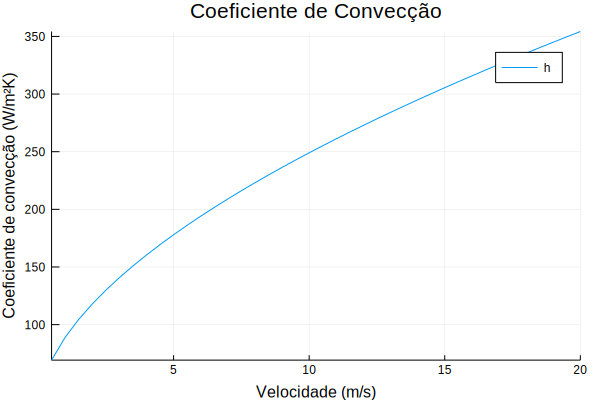

In [5]:
plot(U, h, xlab="Velocidade (m/s)", ylab="Coeficiente de convecção (W/m²K)", 
    label="h", title="Coeficiente de Convecção")

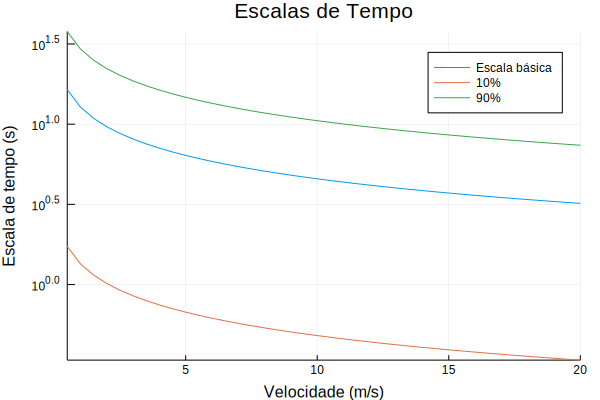

In [6]:
plot(U, t₀, xlab="Velocidade (m/s)", ylab="Escala de tempo (s)", 
    title="Escalas de Tempo", label="Escala básica", yscale=:log10)
plot!(U, t₁, label="10%")
plot!(U, t₂, label="90%")

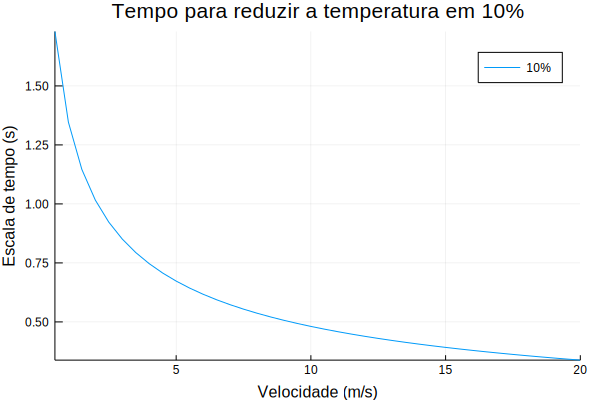

In [7]:
plot(U, t₁, xlab="Velocidade (m/s)", ylab="Escala de tempo (s)", 
    title="Tempo para reduzir a temperatura em 10%", label="10%")


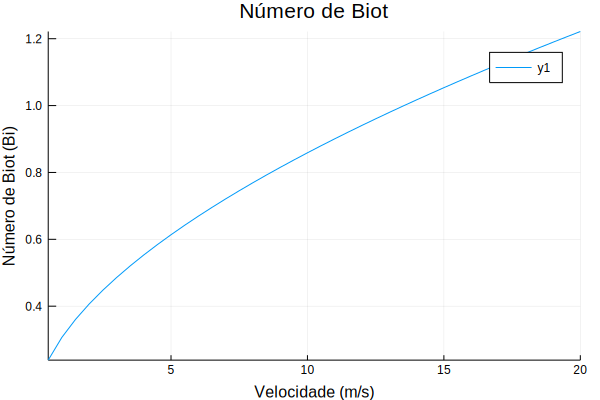

In [8]:
plot(U, Bi, xlab="Velocidade (m/s)", ylab="Número de Biot (Bi)", 
    title="Número de Biot")

## Conclusões

As escalas de tempo variam com a velocidade devido à variação do coeficiente de convecção. 

O tempo que leva para que a temperatura caia 10% varia entre 1 s (para 2 m/s) e 0.2 s para velocidade de 15 m/s.

Uma observação importante é que o número de Biot é maior que 1 para velocidade de 15 m/s. Ou seja, exceto para velocidades muito baixas (inferiores a 1 m/s em geral) não é razoável admitir temperatura do termistor uniforme. Uma análise mais precisa deve introduzir uma distribuição de temperatura dentro do termistor. Mas como uma análise inicial de um sensor que será calibrado estas constantes de tempo são razoáveis.
